In [1]:
import pandas as pd
data = pd.read_csv('Components.csv')
data.tail()

,id,File Name,Component Name,Language,Type,Domain,Functionality,Input,Output
49,NaN,AgeDisplay.py,Age Display,python,Flask,NaN,display of age calculated,age,age
50,NaN,AgeCalculator.java,Age Calculator,java,NaN,NaN,calculate age using year of birth and display ...,NaN,NaN
51,NaN,Register.py,Register,python,Flask,NaN,register page with username and password,NaN,register
52,NaN,Register1.py,Register,python,Flask,NaN,"register page with username, email and password",NaN,register
53,NaN,Register2.py,Register,python,Flask,NaN,"register page with username, email, password a...",NaN,register


In [2]:
functionalites=data.loc[:,"Functionality"]
componentNames=data.loc[:,"Component Name"]
componentFileNames=data.loc[:,"File Name"]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(functionalites)

In [4]:
print(vectorizer.get_feature_names())
print(X.shape)

['add', 'address', 'age', 'airline', 'amount', 'and', 'arrival', 'author', 'authors', 'based', 'birth', 'book', 'box', 'button', 'calculate', 'calculated', 'captcha', 'card', 'cash', 'charge', 'cities', 'city', 'class', 'code', 'confirm', 'containing', 'credit', 'date', 'days', 'dd', 'debit', 'delivery', 'departure', 'details', 'display', 'displaying', 'distance', 'dob', 'dropdown', 'duration', 'email', 'emi', 'enter', 'fare', 'format', 'genres', 'gst', 'guests', 'height', 'id', 'in', 'length', 'like', 'list', 'login', 'mm', 'name', 'netbanking', 'number', 'of', 'on', 'options', 'page', 'password', 'payment', 'percentage', 'phone', 'pic', 'picker', 'player', 'price', 'profile', 'register', 'room', 'search', 'shipping', 'state', 'stops', 'submit', 'the', 'to', 'topic', 'type', 'ui', 'upi', 'url', 'username', 'using', 'video', 'weight', 'width', 'with', 'year', 'years', 'youtube', 'yyyy']
(54, 96)


/home/anshuman/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

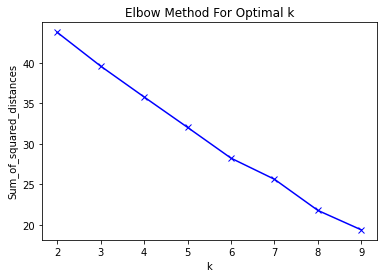

In [6]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
true_k = 7
model=KMeans(n_clusters=true_k).fit(X)
labels=model.labels_
functionality_cluster=pd.DataFrame(list(zip(componentNames,labels,componentFileNames)),columns=['Component Name','cluster','File Name'])
print(functionality_cluster.sort_values(by=['cluster']))

            Component Name  cluster                   File Name
16  Travel Fare Calculator        0     FareCalculatorTravel.py
31         Shipping Charge        0           shippingCharge.py
39           Room Selector        0            RoomSelector.jsp
40           Room Selector        0             RoomSelector.py
44          Flight Display        0            FlightDisplay.py
45          Flight Display        0         FlightDisplayUI.jsp
48             Date Picker        0               DatePicker.py
49             Age Display        0               AgeDisplay.py
19          GST Calculator        0            GSTCalculator.js
18          GST Calculator        0            GSTCalculator.py
17          GST Calculator        0          GSTCalculator.java
32         Shipping Charge        0           shippingCharge.js
15  Travel Fare Calculator        0     FareCalculatorTravel.js
14   Hotel Fare Calculator        0      FareCalculatorHotel.py
38           Room Selector        0     

In [8]:
component_by_cluster={}
for k in range(0,true_k):
    titles=functionality_cluster[functionality_cluster.cluster==k]['Component Name']
    filenames=functionality_cluster[functionality_cluster.cluster==k]['File Name']
    component_by_cluster[k]=filenames

In [9]:
# for usecase in usecases:
# #     read each bit by bit point of use case as list store it as system requirement
# # vectorize the list
# # apply prediction
#     pass


usecases=[]
useCase1=[
    "User Registers using email and password",
    "user logs in using username and password",
    "login is authenticated from the server",
    "a list of youtube videos is displayed to the user",
    "a video list item contains video name,video watch count ,on clicking on a video , youtube video player is opened and video is played using youtube video id",
    "User logs out"
]
useCase2=[
    "User enters DOB using date picker with format YYYY-MM-DD",
    "age is calculated from DOB with date format in YYYY-MM-DD",
    "Calculated age is displayed"
]
useCase3=[
    "User registers using email, username and password",
    "user logs in using username and password with captcha",
    "username and password is checked",
    "if the username and password not matched then error page is displayed",
    "if matched then, user chooses city from city state dropdown",
    "hotels are searched for using city and state name",
    "list of hotels is displayed",
    "user selects a hotel from the list, the user enters room type and number of persons",
    "users enters date of booking",
    "fare is calculated for the booking using room type and number of persons",
    "gst is calculated on the fare",
    "payments options are displayed which contains options like credit card, debit card and upi",
    "payment api",
    "on sucessful payment booking confirmed page is shown displaying username ,room type ,number of persons and fare"
    "on unsucessful payment payment failed page is shown"
    "logout or book another option"
]
useCase4=[
    "login page is displayed with register button.User logs in using username and password",
    "username and password is matched with database",
    "if user found then add book, search book options are displayed",
    "on add book option user enters book name, book year, book price",
    "book name is matched with database",
    "if no match found then user selects the genre and author name from dropdown",
    "book added sucessfully dialog is shown",
    "user back to home screen",
    "on search book option book name is entered by the user",
    "book genere and author name is selected by the user from dropdown",
    "book is searched from the database using book name, author name and genre",
    "if book is found, the list of books are displayed with book name, book price and author name",
    "user selects a book from the list, the cost of renting the book is calculated",
    "gst is calculated for the renting price",
    "payment page is displayed with options like upi and cash",
    "book count is updated for the selected book", 
    "main window is displayed again"
]
useCase5=[
    "User register using username, email , password and confirm password"
    "user logs in using username and password"
    "username password combination is compared",
    "if no match found then error page is displayed",
    "if match is found then user selects from city , to city from dropdown",
    "user enters date of journey",
    "user enter the class type",
    "flights are searched using from city , to city and date of journey",
    "list of flights are displayed with details like airline name, airline code, departure time, arrival time , number of stops, duration",
    "user selects a flight from the list",
    "user enters passenger details like name, age, address and phone number",
    "gst is calculated on the fare",
    "payment page is displayed with options like credit card, debit card, upi and netbanking",
    "payment api",
    "on payment confirmed booking page confirmation is displayed",
    "if payment failed then payment failed page is displayed",
    "logout or book another page is displayed",
    "if logout then thank you page is displayed"
]



        

In [10]:
requirement1="User enters DOB using date picker with format YYYY-MM-DD"
requirement2="age is calculated from DOB with date format in YYYY-MM-DD"
requirement3="Calculated age is displayed"
req_list=[requirement1,requirement2,requirement3]
language='python'

In [11]:
req = vectorizer.transform(req_list)
result=model.predict(req)
print(len(result))

3


In [12]:
req1=vectorizer.transform(useCase1)
result1=model.predict(req1)
print(result1)

[5 5 0 0 3 0]


In [13]:
req2=vectorizer.transform(useCase2)
result2=model.predict(req2)
print(result2)

[0 0 0]


In [14]:
req_list_answer=[""]*len(req_list)
print(len(req_list_answer))

3


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
component_langauge=data[data['Language'] == language]
i=0
# loop through each cluster number in the result
for clusterNumber in result:
    # get all the components in the given cluster
    components=component_by_cluster[clusterNumber]
    # loop through all the components in the cluster
    most_similar=""
    most_similar_score=0
    for component_fileName in components:
        component_current=component_langauge[component_langauge['File Name']==component_fileName]
        if component_current.empty:
            continue
        functionality=str(component_current['Functionality'].str.lower())
        text_tokens = word_tokenize(functionality)
        tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]


        input_tokens = word_tokenize(req_list[i])
        input_tokens_without_stopwords = [word for word in input_tokens if not word in stopwords.words()]

        match_count=0
        for token in input_tokens_without_stopwords:
            if token in functionality:
                match_count+=1
            score=match_count/len(tokens_without_sw)

        if score>most_similar_score:
            most_similar_score=score
            most_similar=component_fileName
    req_list_answer[i]=most_similar
    i+=1
    

[nltk_data] Error loading punkt: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>


In [16]:
import subprocess
import os

if language=='python':
    for filename in req_list_answer:
        myvars = {}
        myvars['']=""
        with open("temp.txt") as myfile:
            for line in myfile:
                name, var = line.partition("=")[::2]
                print(name+":"+var)
                myvars[name.strip()] = var
        # get the component details using file name
        component=data.loc[data['File Name']==filename]
        # get the inputs of file
        print(filename)
        component_type=component.iloc[0]['Type']
        output=component.iloc[0]['Output']
        inputT=component.iloc[0]['Input']
        if pd.isna(inputT):
            inputT=""
        if pd.isna(output):
            output=""
        if component_type=='Flask':
            os.environ["FLASK_APP"] = filename
            flask_process=subprocess.Popen(["flask","run"])
            window=subprocess.Popen(["firefox","http://localhost:5000/"+output+"?"+str(inputT)+"="+myvars[str(inputT)]])
            window.wait()
            flask_process.terminate()
            flask_process.kill()
        else:
            print(myvars[str(inputT)])
            python_process=subprocess.Popen(["python",filename,myvars[str(inputT)]])
            python_process.wait()
            
            
            

username:anshumansekhar

password:12345

loginCheck:true

authorName:Fiction

genre:Fiction

dateofbirth:2022-06-15

age:45

DatePicker.py
username:anshumansekhar

password:12345

loginCheck:true

authorName:Fiction

genre:Fiction

dateofbirth:2022-06-15

age:45

dateofbirth:2016-04-07

ageCalculator.py
2016-04-07

username:anshumansekhar

password:12345

loginCheck:true

authorName:Fiction

genre:Fiction

dateofbirth:2022-06-15

age:45

dateofbirth:2016-04-07

AgeDisplay.py
